# Assignment 1: How much does your car cost?

## Data

The retail price of 2005 General Motors cars can be found in `car_data.csv`.

**Data Descriptions**:

||Features|Descriptions
|-|-|-|
|1| Price   | suggested retail price of the used 2005 GM car in excellent condition|
|2| Mileage | number of miles the car has been driven|
|3| Make    | manufacturer of the car such as Saturn, Pontiac, and Chevrolet|
|4| Model   | specific models for each car manufacturer such as Ion, Vibe, Cavalier|
|5| Trim (of car)| specific type of car model such as SE Sedan 4D, Quad Coupe 2D |         
|6| Type    | body type such as sedan, coupe, etc |
|7| Cylinder| number of cylinders in the engine    |    
|8| Liter   | a more specific measure of engine size|     
|9| Doors   | number of doors           |
|10| Cruise | indicator variable representing whether the car has cruise control (1 = cruise)|
|11| Sound  | indicator variable representing whether the car has upgraded speakers (1 = upgraded)|
|12| Leather| indicator variable representing whether the car has leather seats (1 = leather)|

#### 1 Import necessary libraries

In [1]:
# Libraries to load data
import pandas as pd
import numpy as np
# Libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt
# Libraries to create and evaluate models
from sklearn.linear_model import LinearRegression

#### 2. Load the data from csv file to `pandas` dataframe

In [9]:
df = pd.read_csv('car_data.csv')

#### 3. Inspect the first 5 rows of the dataframe

In [26]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [28]:
df['Liter'].unique()

array([3.1, 3.6, 3.8, 5.7, 2.8, 4.6, 1.6, 2.2, 6. , 3.5, 3.4, 1.8, 2. ,
       2.3, 2.5, 3. ])

#### 4. Check the number of rows and columns

In [8]:
df.shape

(804, 12)

- Gồm 804 dòng và 12 cột

#### 5. Get some information about the dataset via `.info()`

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


- Gồm 12 cột: 2 cột float, 6 cột kiểu số nguyên, 4 cột kí tự chuỗi

#### 6. Check number of missing values per columns

In [12]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

- Không có giá trị trống

#### 7. Get table of distributions each features and visualize this distribution.

In [13]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [16]:
df[['Make','Model','Trim','Type']].describe()

,Make,Model,Trim,Type
count,804,804,804,804
unique,6,32,47,5
top,Chevrolet,Malibu,Sedan 4D,Sedan
freq,320,60,170,490


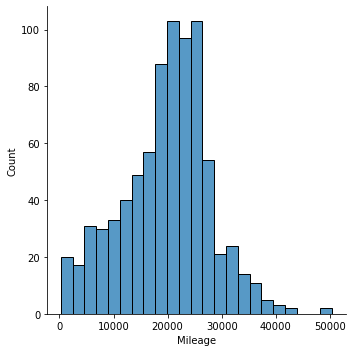

In [25]:
sns.displot(data=df['Mileage'])
plt.show()

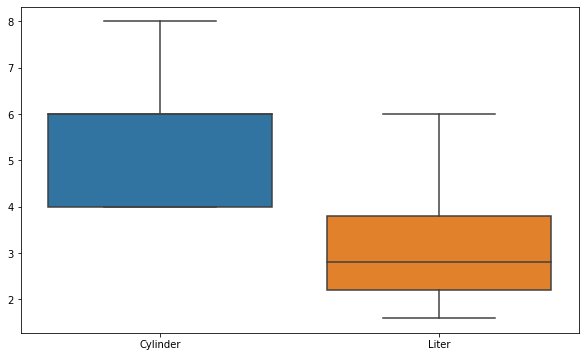

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:,2:8])
plt.show()

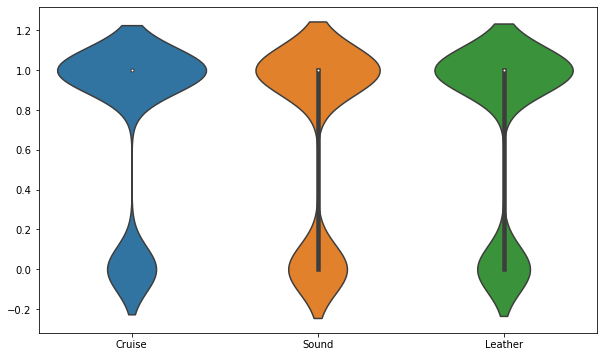

In [60]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df.iloc[:,9:12])
plt.show()

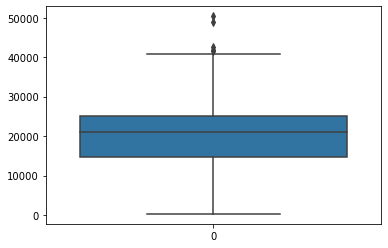

In [57]:
sns.boxplot(data=df['Mileage'])
plt.show()

#### 8. Visualize correlation coefficient between features and label.

In [61]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


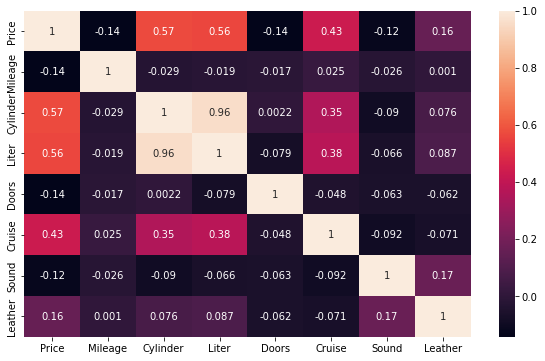

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

Với Label là Price, ta thấy:
- Các feature nghịch biến với Label là: Mileage, Doors, Sound.
- Các feature đồng biến với Label là: Cylinder, Liter, Cruise, Leather. Tuy nhiên, Leather cho ra con số tương quan khá thấp (0.16) với nhãn Price.

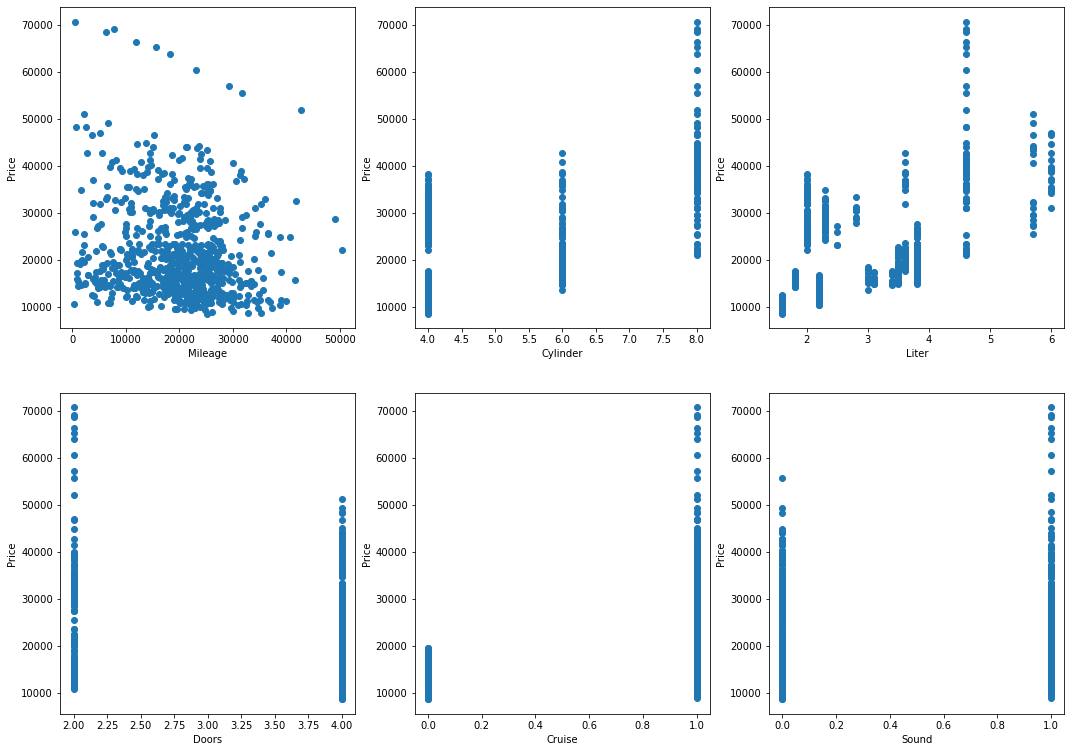

In [66]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(18,13))
ax[0][0].scatter(x=df.Mileage,y=df.Price)
ax[0][0].set(xlabel='Mileage',ylabel='Price')

ax[0][1].scatter(x=df.Cylinder,y=df.Price)
ax[0][1].set(xlabel='Cylinder',ylabel='Price')

ax[0][2].scatter(x=df.Liter,y=df.Price)
ax[0][2].set(xlabel='Liter',ylabel='Price')

ax[1][0].scatter(x=df.Doors,y=df.Price)
ax[1][0].set(xlabel='Doors',ylabel='Price')

ax[1][1].scatter(x=df.Cruise,y=df.Price)
ax[1][1].set(xlabel='Cruise',ylabel='Price')

ax[1][2].scatter(x=df.Sound,y=df.Price)
ax[1][2].set(xlabel='Sound',ylabel='Price')
plt.show()

#### 9. Split the dataset into train and test set with ratio 90:10 with random seeds of 42.

In [69]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [67]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns=['Doors','Cruise','Sound','Make','Model','Trim','Type','Price','Leather']),df.Price, test_size=0.1, random_state=42)

In [72]:
xtrain.shape, xtest.shape

((723, 3), (81, 3))

#### 10. Find the best combination of factors to predict price with linear regression classifier.

E.g:
- Use mileage to find the linear regression equation.
- Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

`Use mileage to find the linear regression equation.`

In [76]:
model = LinearRegression()
model.fit(xtrain.Mileage.to_frame(),ytrain)

LinearRegression()

In [79]:
predict = model.predict(xtest.Mileage.to_frame())
predict

array([22306.31236718, 21073.05002494, 20073.05304048, 22881.99176136,
       21248.46153768, 19307.4986723 , 19956.67263126, 21145.87187059,
       19230.80869165, 22364.50257179, 20858.28444318, 21475.16788397,
       20970.29217806, 21554.88510069, 21880.64933865, 21163.86710728,
       21376.78271144, 20490.97979904, 21100.6315092 , 17775.7172168 ,
       18825.15905719, 20763.93558541, 19827.17419903, 20887.71590505,
       19779.91568026, 22116.60557296, 23861.63899218, 19473.49211725,
       20900.49756849, 20415.63525665, 20863.83437599, 23297.73218275,
       22511.99624071, 23569.67889043, 22371.0615833 , 21989.96619702,
       20513.85224941, 21446.40914123, 21385.02352076, 21861.81320305,
       21018.05523619, 19304.30325644, 23083.97567968, 20888.72498374,
       20676.48209871, 23573.7152052 , 18775.04148212, 20016.54463369,
       21095.08157639, 20388.89467129, 23244.41919182, 23362.81775843,
       18943.72580358, 22732.98447441, 24569.67587488, 20261.07803689,
      

In [81]:
pd.DataFrame({'Predict': predict,
             'Groundtruth': ytest})

,Predict,Groundtruth
192,22306.312367,11302.902985
717,21073.050025,29114.544506
168,20073.053040,10777.052537
522,22881.991761,20677.593819
536,21248.461538,15253.868566
...,...,...
596,20741.567674,12465.508523
752,21231.139020,13991.040057
327,21204.062075,14191.882277
758,20353.913277,13811.155022


`Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation`

In [85]:
df2 = df.drop(columns=['Make','Model','Trim','Type','Price'])
df2.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1


In [86]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(df2,df.Price, test_size=0.1, random_state=42)

In [87]:
model = LinearRegression()
model.fit(xtrain1,ytrain1)

LinearRegression()

In [88]:
predict2 = model.predict(xtest1)
predict2

array([10112.18420231, 19713.39607737,  9870.31168112, 23008.55091814,
       27941.68440459,  8468.21396208, 16488.10569134, 11572.25988493,
       13177.15604604, 19285.25881183, 20608.99784183, 15093.80610307,
       20890.35290036, 22142.95016315, 18581.20134386, 24501.0583182 ,
       18473.06092625, 32739.32146137, 21025.26534968, 20994.03095821,
       21978.67995597, 25851.99673708, 19541.70980728, 10510.33036953,
       22763.70776732, 21911.46873965, 23717.72883531, 19175.61834803,
       11927.95923899, 22220.56125343, 17427.0963386 , 20461.40930834,
       16573.46815729, 20329.49260646, 25057.5067143 , 27324.27180356,
       14169.51480094, 24793.5136922 , 23223.9617152 , 12313.32091299,
       24045.28899557, 19369.13831717, 16759.06092912, 24114.64866971,
       20586.23412751, 19742.1823549 , 18757.50316023, 23008.63914305,
       18181.47595514, 20123.13894371, 26654.60917049, 31793.51367099,
        6631.61709045, 22918.11909688, 18367.6420626 , 15977.61518709,
      

In [89]:
pd.DataFrame({'Predict':predict2,'Groundtruth':ytest1})

,Predict,Groundtruth
192,10112.184202,11302.902985
717,19713.396077,29114.544506
168,9870.311681,10777.052537
522,23008.550918,20677.593819
536,27941.684405,15253.868566
...,...,...
596,14405.219906,12465.508523
752,11641.053871,13991.040057
327,17880.875171,14191.882277
758,14003.964170,13811.155022


#### 11. Evaluate your model performance using R-squared Error.

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
#only use mileage
mean_absolute_error(ytest, predict)

0.01748245111325064

In [93]:
#only use mileage
mean_squared_error(ytest, predict)

85383932.31002837

In [94]:
#only use mileage
r2_score(ytest, predict)

0.01748245111325064

In [95]:
#use all features
mean_absolute_error(ytest1, predict2)

5750.896240700843

In [96]:
#use all features
mean_squared_error(ytest1, predict2)

55581335.31663797

In [97]:
#use all features
r2_score(ytest1, predict2)

0.36042255420061353

#### 12. Visualize the actual prices and predicted prices of the test set.

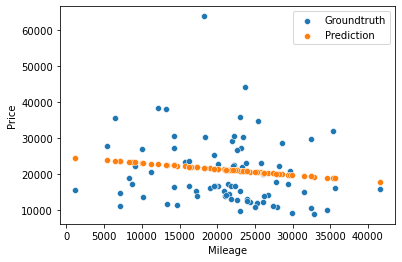

In [100]:
#only use 'Mileage' Feature
sns.scatterplot(x=xtest.Mileage, y=ytest, label='Groundtruth')
sns.scatterplot(x=xtest.Mileage, y=predict, label ='Prediction')
plt.legend()
plt.show()